<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Tratamiento_de_datos_Modelo_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering coorporativo para manejo de relaciones**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 5 de diciembre del 2023
*   Fechad de actualización: 5 deenero del 2024
*   Descripción: El presente Script tiene como objetivo crear un modelo de clusterización para poder tener una clara gestion de las relaciones.


### Conexion con la el Datawarehouse

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Mounted at /content/drive


### Seleccion e instalacion de bibliotecas y librerias necesarias para el trabajo

In [ ]:
pip install pandas fuzzywuzzy

In [ ]:
pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos
import numpy as np #importo la libreria numpy manipular y molderar los datos
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo
from fuzzywuzzy import process #Esta es uuna libreria de procesamiento de cadenas y texto
from rapidfuzz import process #Esta es uuna libreria de procesamiento de cadenas y texto
from fuzzywuzzy import fuzz
import unicodedata

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Conexion para subir las bases de datos seleccionadas.

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Msc. Bussines Inteligence & Data Analysis/Proyecto de Titulacion/Bases/1. Simplicity_registrohistorico.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Msc. Bussines Inteligence & Data Analysis/Proyecto de Titulacion/Bases/3._ Supercom_ranking_2022.xlsx')
df3 = pd.read_excel("/content/drive/MyDrive/Msc. Bussines Inteligence & Data Analysis/Proyecto de Titulacion/Bases/2. Supercom_directorio_companias.xlsx")

### Tratamiento y exploracion de las bases

In [ ]:
df1.columns= df1.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula
df2.columns= df2.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula
df3.columns= df3.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [ ]:
# Cambio los espacios y caracteres especiales de los nombres de las columnas de todos los dataframes

df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace(' ', '_')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222 entries, 0 to 7221
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                7222 non-null   int64  
 1   organization_name         7222 non-null   object 
 2   primary_contact           7044 non-null   object 
 3   contact:_employer(count)  7222 non-null   int64  
 4   email                     7187 non-null   object 
 5   phone                     7168 non-null   object 
 6   address                   2670 non-null   object 
 7   account_manager           0 non-null      float64
 8   flags                     0 non-null      float64
 9   created                   7222 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 564.3+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103340 entries, 0 to 103339
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   posición                          103340 non-null  int64  
 1   año                               103340 non-null  int64  
 2   pocisión_                         103340 non-null  int64  
 3   año.1                             103340 non-null  int64  
 4   expediente                        103340 non-null  int64  
 5   nombre                            103340 non-null  object 
 6   tipo_compañía                     103340 non-null  object 
 7   actividad_económica               103340 non-null  object 
 8   región_                           103340 non-null  object 
 9   provincia                         103340 non-null  object 
 10  ciudad                            103340 non-null  object 
 11  tamaño                            103337 non-null  o

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198023 entries, 0 to 198022
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   no._fila            198023 non-null  int64  
 1   expediente          198023 non-null  int64  
 2   ruc                 191525 non-null  object 
 3   nombre              198023 non-null  object 
 4   situación_legal     198023 non-null  object 
 5   fecha_constitucion  198023 non-null  object 
 6   tipo                198023 non-null  object 
 7   país                198023 non-null  object 
 8   región              198023 non-null  object 
 9   provincia           198023 non-null  object 
 10  cantón              198023 non-null  object 
 11  ciudad              198023 non-null  object 
 12  calle               197225 non-null  object 
 13  número              192740 non-null  object 
 14  intersección        190043 non-null  object 
 15  barrio              90546 non-null

In [ ]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = df1.isnull().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(df1) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
#se multiplica porcien para obtener un valor en porcentaje y se lo redonde a 2 decimales
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

unnamed:_0                    0.00
organization_name             0.00
primary_contact               2.46
contact:_employer(count)      0.00
email                         0.48
phone                         0.75
address                      63.03
account_manager             100.00
flags                       100.00
created                       0.00
dtype: float64

Una vez que sse ha realizado el porcentaje de valores erdidos se procede a eliminar las columnas con mas de 15 porciento de perdida y aquellas columnas con menos del 5% se procede a eliminar los datos.

In [ ]:
df1 = df1.drop(columns=['account_manager', 'flags','address']) #Elimino las columnas.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222 entries, 0 to 7221
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   unnamed:_0                7222 non-null   int64 
 1   organization_name         7222 non-null   object
 2   primary_contact           7044 non-null   object
 3   contact:_employer(count)  7222 non-null   int64 
 4   email                     7187 non-null   object
 5   phone                     7168 non-null   object
 6   created                   7222 non-null   object
dtypes: int64(2), object(5)
memory usage: 395.1+ KB


In [ ]:
df1 = df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7018 entries, 0 to 7221
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   unnamed:_0                7018 non-null   int64 
 1   organization_name         7018 non-null   object
 2   primary_contact           7018 non-null   object
 3   contact:_employer(count)  7018 non-null   int64 
 4   email                     7018 non-null   object
 5   phone                     7018 non-null   object
 6   created                   7018 non-null   object
dtypes: int64(2), object(5)
memory usage: 438.6+ KB


In [ ]:
# Cambio el tipo de dato de la columna created al formato fecha

df1['created'] = pd.to_datetime(df1['created'])
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7018 entries, 0 to 7221
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   unnamed:_0                7018 non-null   int64         
 1   organization_name         7018 non-null   object        
 2   primary_contact           7018 non-null   object        
 3   contact:_employer(count)  7018 non-null   int64         
 4   email                     7018 non-null   object        
 5   phone                     7018 non-null   object        
 6   created                   7018 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 438.6+ KB


In [ ]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = df2.isnull().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(df2) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
#se multiplica porcien para obtener un valor en porcentaje y se lo redonde a 2 decimales
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

posición                            0.0
año                                 0.0
pocisión_                           0.0
año.1                               0.0
expediente                          0.0
nombre                              0.0
tipo_compañía                       0.0
actividad_económica                 0.0
región_                             0.0
provincia                           0.0
ciudad                              0.0
tamaño                              0.0
sector                              0.0
cant._empleados                     0.0
activio_2022                        0.0
patrimonio_2022                     0.0
ingreso_por_ventas_2022             0.0
utilidad_antes_del_impuesto_2022    0.0
utilidad_del_ejercicio_2022         0.0
utilidad_neta_2022                  0.0
ir_causado_2022                     0.0
ingreso_total_2022                  0.0
dtype: float64

No se necesita realizar ningun cambio

In [ ]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = df3.isnull().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(df3) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
#se multiplica porcien para obtener un valor en porcentaje y se lo redonde a 2 decimales
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

no._fila               0.00
expediente             0.00
ruc                    3.28
nombre                 0.00
situación_legal        0.00
fecha_constitucion     0.00
tipo                   0.00
país                   0.00
región                 0.00
provincia              0.00
cantón                 0.00
ciudad                 0.00
calle                  0.40
número                 2.67
intersección           4.03
barrio                54.28
teléfono               3.23
representante          1.41
cargo                  1.41
capital_suscrito       0.22
ciiu_nivel_1           0.14
ciiu_nivel_6           0.14
último_balance        24.76
dtype: float64

In [ ]:
df3 = df3.drop(columns = ['barrio','último_balance'])

In [ ]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176298 entries, 0 to 198015
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   no._fila            176298 non-null  int64 
 1   expediente          176298 non-null  int64 
 2   ruc                 176298 non-null  object
 3   nombre              176298 non-null  object
 4   situación_legal     176298 non-null  object
 5   fecha_constitucion  176298 non-null  object
 6   tipo                176298 non-null  object
 7   país                176298 non-null  object
 8   región              176298 non-null  object
 9   provincia           176298 non-null  object
 10  cantón              176298 non-null  object
 11  ciudad              176298 non-null  object
 12  calle               176298 non-null  object
 13  número              176298 non-null  object
 14  intersección        176298 non-null  object
 15  teléfono            176298 non-null  object
 16  re

### Preparacion de las bases para el modelo de cluster

In [ ]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])
    return only_ascii

# Clean and standardize the names
def clean_names(input_str):
    # Remove accents
    cleaned = remove_accents(input_str)
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Strip leading/trailing whitespace
    cleaned = cleaned.strip()
    return cleaned

# Apply the function to the columns in your dataframes
df1['organization_name'] = df1['organization_name'].apply(clean_names)
df2['nombre'] = df2['nombre'].apply(clean_names)
df3['nombre'] = df3['nombre'].apply(clean_names)

In [ ]:
# Function to find best matches from df2 in df1
def get_best_match(name, candidate_names, limit=1):
    best_matches = process.extract(name, candidate_names, limit=limit)
    return best_matches

# Apply the matching function to each name in df1
df1['matches'] = df1['organization_name'].apply(lambda x: get_best_match(x, df2['nombre']))

In [ ]:
print("Primeros elementos de 'matches':", df1['matches'].head())

Primeros elementos de 'matches': 0                   [(equinoxair s.a.s., 100.0, 1158)]
1           [(confiamed s.a., 96.2962962962963, 1260)]
2    [(corporacion ars-magna cia.ltda., 93.54838709...
3    [(operadora y procesadora de productos marinos...
4    [(cptdc china petroleum technology & developme...
Name: matches, dtype: object


In [ ]:
# Simplificamos la función dado que sabemos que 'matches' contiene listas con una tupla
def verificar_tupla(match):
    if match and isinstance(match, list) and len(match[0]) == 3:
        return match[0]  # Si hay una tupla, devuelve esa tupla
    else:
        return ('No Match', 0, -1)  # Devuelve una tupla predeterminada para casos no válidos o sin coincidencia

# Aplicar la función de verificación
df1['matches'] = df1['matches'].apply(verificar_tupla)

# Paso 3: Dividir las tuplas en columnas independientes
df1['matched_name'] = df1['matches'].apply(lambda x: x[0])
df1['similarity_score'] = df1['matches'].apply(lambda x: x[1])
df1['match_index'] = df1['matches'].apply(lambda x: x[2])

# Verificar los resultados
print("Nuevas columnas después de dividir 'matches':")
print(df1[['matched_name', 'similarity_score', 'match_index']].head())

Nuevas columnas después de dividir 'matches':
                                        matched_name  similarity_score  \
0                                  equinoxair s.a.s.        100.000000   
1                                     confiamed s.a.         96.296296   
2                    corporacion ars-magna cia.ltda.         93.548387   
3  operadora y procesadora de productos marinos o...         85.500000   
4  cptdc china petroleum technology & development...         85.500000   

   match_index  
0         1158  
1         1260  
2        51098  
3           23  
4          393  


In [ ]:
df1

,unnamed:_0,organization_name,primary_contact,contact:_employer(count),email,phone,created,matches,matched_name,similarity_score,match_index
0,0,equinoxair s.a.s.,SONIA ASANZA,1,equinoxairsas@gmail.com,3810950,2021-10-21 10:01:18,"(equinoxair s.a.s., 100.0, 1158)",equinoxair s.a.s.,100.000000,1158
1,1,confiamed s.a,Danny Rodriguez,1,drodriguez@confiamed.com,3932300 ext. 51,2018-07-10 10:27:00,"(confiamed s.a., 96.2962962962963, 1260)",confiamed s.a.,96.296296,1260
2,2,corporacion ars-magna. cia ltda,Jorge A Ruiz,1,pami.mkt@gmail.com,0964067945,2021-05-04 13:41:40,"(corporacion ars-magna cia.ltda., 93.548387096...",corporacion ars-magna cia.ltda.,93.548387,51098
3,3,ecocra sa,Diego Camilo Miño,1,dmino@ecocrasa.com,0998255757,2019-09-30 09:18:01,(operadora y procesadora de productos marinos ...,operadora y procesadora de productos marinos o...,85.500000,23
4,4,ifran technology,Francisco Muñoz,1,fran_zisco@yahoo.com,2377721,2017-08-04 10:32:22,(cptdc china petroleum technology & developmen...,cptdc china petroleum technology & development...,85.500000,393
...,...,...,...,...,...,...,...,...,...,...,...
7217,7217,zurita torres cristobal bladimir,Bladimir Zurita Torres,1,bladimirzurita1@gmail.com,984511082,2017-05-18 13:18:41,(torres & torres agentes de aduanas (ttadad) c...,torres & torres agentes de aduanas (ttadad) c.a.,85.500000,1950
7218,7218,zurita yanez construcciones s.a.,Gianina Revelo,1,grevelo@zyconstrucciones.ec,983835199,2017-05-18 13:19:40,"(gv construcciones s.a., 88.04878048780488, 15...",gv construcciones s.a.,88.048780,15431
7219,7219,zuturismo cia. ltda.,Laura Sánchez,1,info@haciendazuleta.com,062 662 182,2017-05-18 13:20:14,"(zuleta y turismo zuturismo cia. ltda., 90.0, ...",zuleta y turismo zuturismo cia. ltda.,90.000000,8556
7220,7220,zvgroup industrial supplies s.a.s.,Javier Ortega,1,talentohumano@zvgroupecuador.com,02 388 0472,2023-01-18 13:18:50,"(zvgroup industrial supplies s.a.s., 100.0, 18...",zvgroup industrial supplies s.a.s.,100.000000,18642


In [ ]:
vf_df = df1[df1['similarity_score'] > 90]

In [ ]:
vf1_df = pd.merge(vf_df, df3, left_on='matched_name', right_on='nombre', how='inner')

In [ ]:
vf1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1903
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   unnamed:_0                1904 non-null   int64         
 1   organization_name         1904 non-null   object        
 2   primary_contact           1904 non-null   object        
 3   contact:_employer(count)  1904 non-null   int64         
 4   email                     1904 non-null   object        
 5   phone                     1904 non-null   object        
 6   created                   1904 non-null   datetime64[ns]
 7   matches                   1904 non-null   object        
 8   matched_name              1904 non-null   object        
 9   similarity_score          1904 non-null   float64       
 10  match_index               1904 non-null   int64         
 11  no._fila                  1904 non-null   int64         
 12  expediente          

In [ ]:
vf1_df = pd.merge(vf1_df, df2, left_on='matched_name', right_on='nombre', how='inner')

In [ ]:
vf1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 1906
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   unnamed:_0                        1907 non-null   int64         
 1   organization_name                 1907 non-null   object        
 2   primary_contact                   1907 non-null   object        
 3   contact:_employer(count)          1907 non-null   int64         
 4   email                             1907 non-null   object        
 5   phone                             1907 non-null   object        
 6   created                           1907 non-null   datetime64[ns]
 7   matches                           1907 non-null   object        
 8   matched_name                      1907 non-null   object        
 9   similarity_score                  1907 non-null   float64       
 10  match_index                       1907 non-null 

In [ ]:
!pip install openpyxl

In [ ]:
file_path = '/content/drive/MyDrive/Msc. Bussines Inteligence & Data Analysis/Proyecto de Titulacion/Bases/Base_final.xlsx'  # Specify your path and file name
vf1_df.to_excel(file_path, index=False, engine='openpyxl')

### Analisis Exploratorio

In [ ]:
# Resumen estadístico para columnas numéricas
print(vf1_df.describe())

        unnamed:_0  contact:_employer(count)  similarity_score    match_index  \
count  1907.000000               1907.000000       1907.000000    1907.000000   
mean   3647.575249                  1.263765         97.849686   21460.442056   
std    2086.396207                  0.738083          2.708585   23163.532657   
min       0.000000                  0.000000         90.090090       0.000000   
25%    1838.500000                  1.000000         95.238095    3364.500000   
50%    3685.000000                  1.000000        100.000000   12958.000000   
75%    5480.500000                  1.000000        100.000000   32543.000000   
max    7216.000000                 13.000000        100.000000  103018.000000   

            no._fila   expediente_x       posición     año     pocisión_  \
count    1907.000000    1907.000000    1907.000000  1907.0   1907.000000   
mean    51898.146303  157393.491348   21447.171474  2022.0  20460.136864   
std     43022.256264  175791.796809   2313

In [ ]:
# Resumen para columnas categóricas
print(vf1_df.describe(include=['O']))

                    organization_name primary_contact  \
count                            1907            1907   
unique                           1883            1868   
top     puente & asociados cia. ltda.    Supervisores   
freq                                4              10   

                                 email phone  \
count                             1907  1907   
unique                            1901  1855   
top     secretaria@puenteasociados.com     1   
freq                                 4    29   

                                              matches  \
count                                            1907   
unique                                           1879   
top     (puente & asociados cia. ltda., 100.0, 21540)   
freq                                                4   

                         matched_name            ruc  \
count                            1907           1907   
unique                           1843           1844   
top     puente & as

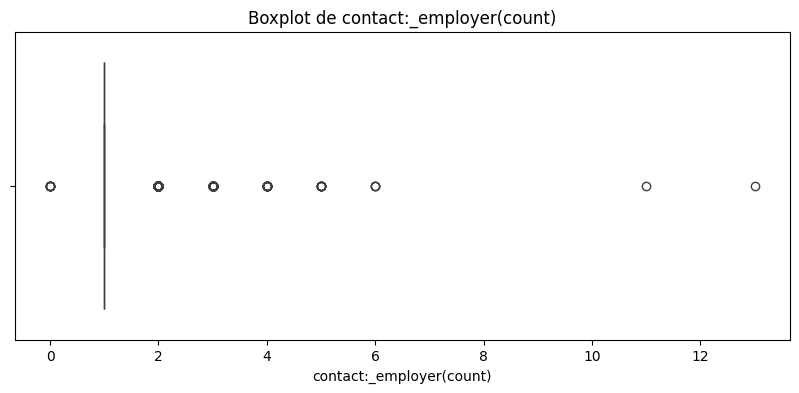

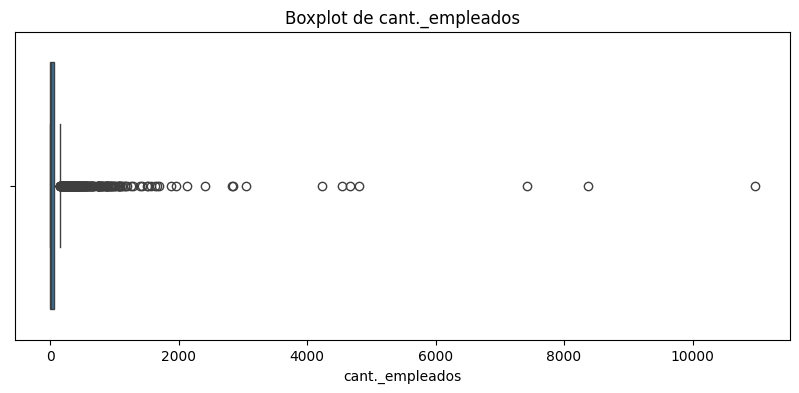

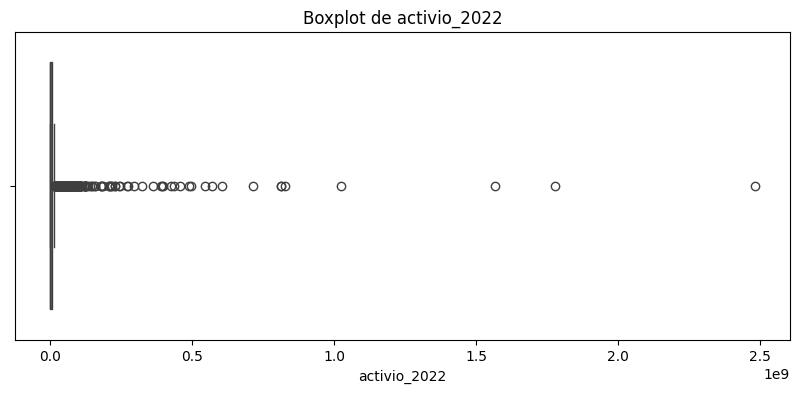

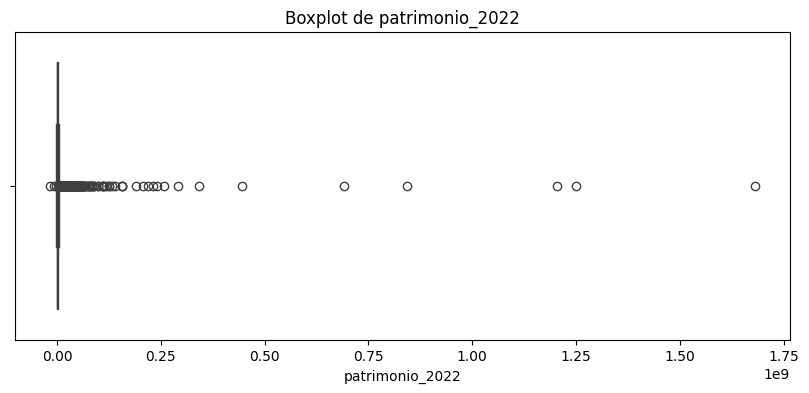

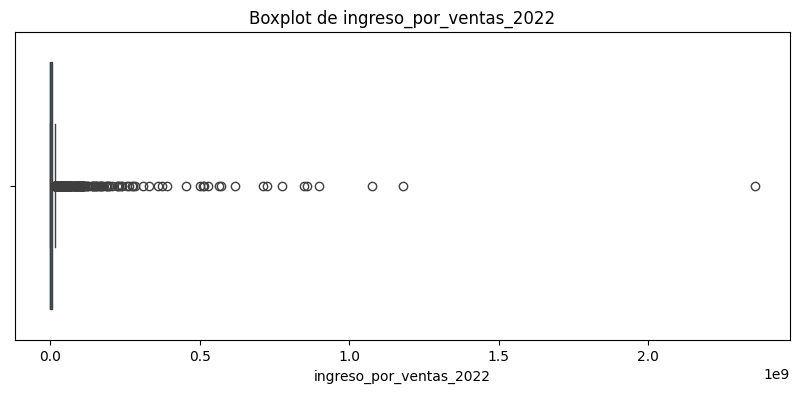

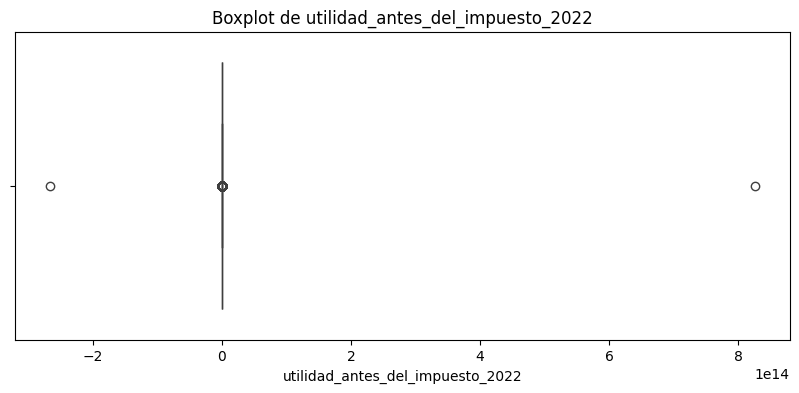

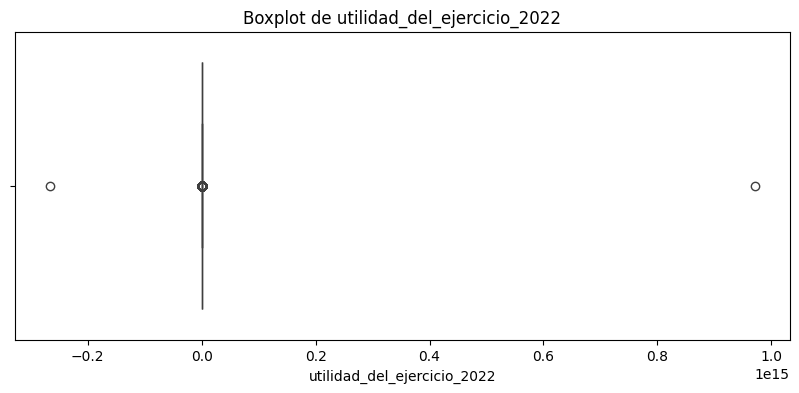

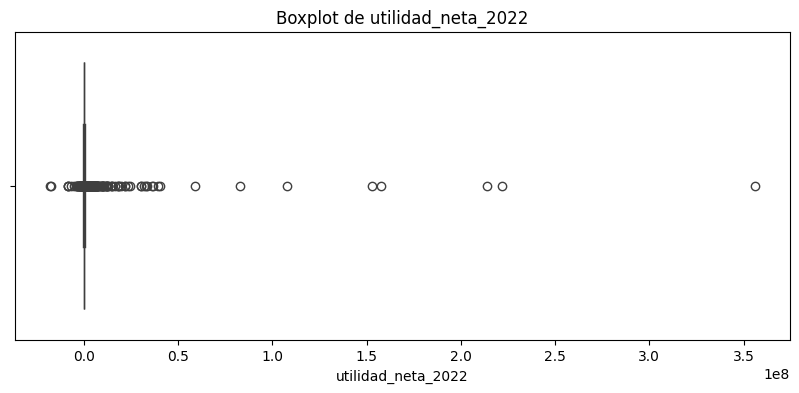

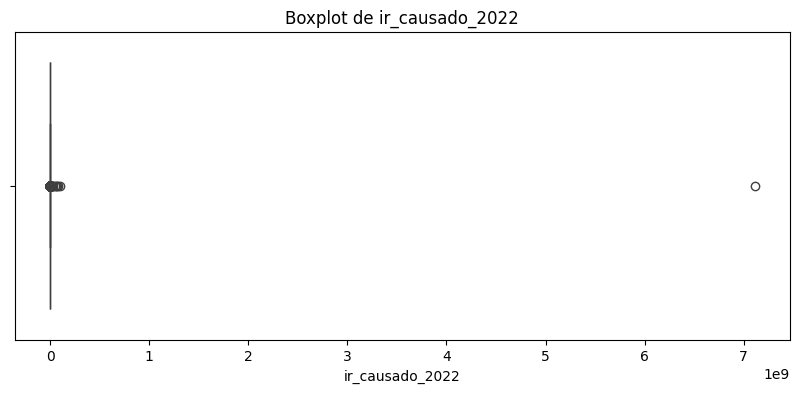

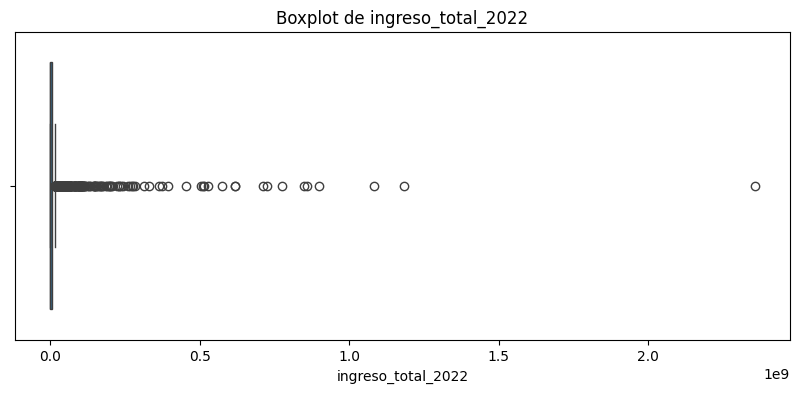

In [ ]:
numeric_cols = ['contact:_employer(count)', 'cant._empleados', 'activio_2022', 'patrimonio_2022',
                'ingreso_por_ventas_2022', 'utilidad_antes_del_impuesto_2022', 'utilidad_del_ejercicio_2022',
                'utilidad_neta_2022', 'ir_causado_2022', 'ingreso_total_2022']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=vf1_df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

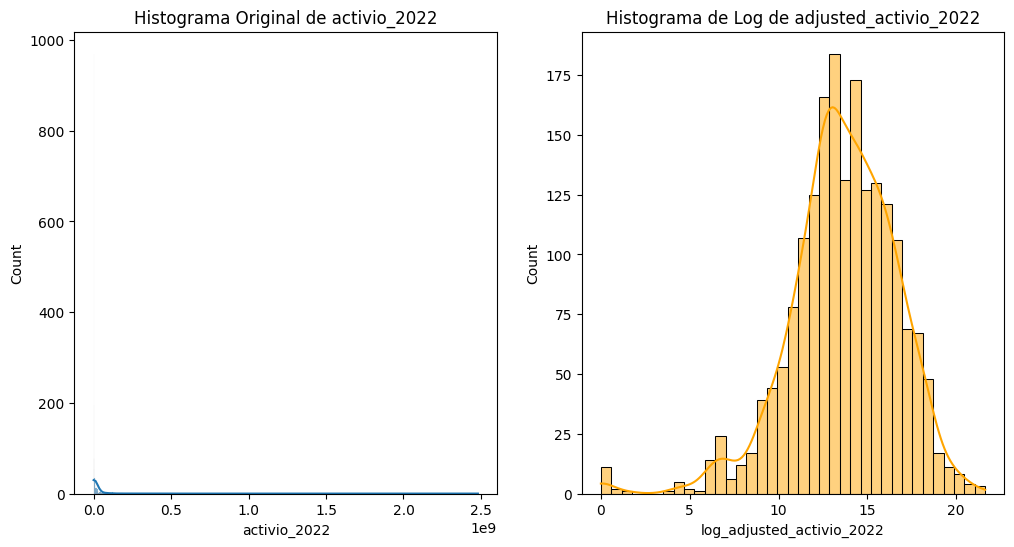

In [ ]:
# Añadir una constante pequeña para evitar valores no positivos
constante = 1 - vf1_df['activio_2022'].min()
vf1_df['adjusted_activio_2022'] = vf1_df['activio_2022'] + constante

# Aplicar transformación logarítmica
vf1_df['log_adjusted_activio_2022'] = np.log(vf1_df['adjusted_activio_2022'])

# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(vf1_df['activio_2022'], kde=True)
plt.title('Histograma Original de activio_2022')

plt.subplot(1, 2, 2)
sns.histplot(vf1_df['log_adjusted_activio_2022'], kde=True, color='orange')
plt.title('Histograma de Log de adjusted_activio_2022')
plt.show()

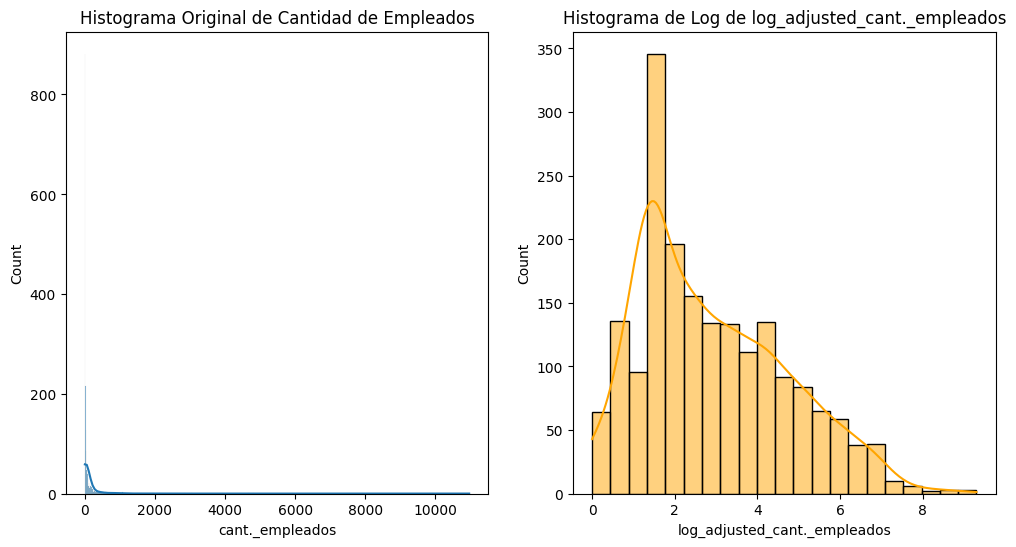

In [ ]:
# Añadir una constante pequeña para evitar valores no positivos
constante = 1 - vf1_df['cant._empleados'].min()
vf1_df['adjusted_cant._empleados'] = vf1_df['cant._empleados'] + constante

# Aplicar transformación logarítmica
vf1_df['log_adjusted_cant._empleados'] = np.log(vf1_df['adjusted_cant._empleados'])

# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(vf1_df['cant._empleados'], kde=True)
plt.title('Histograma Original de Cantidad de Empleados')

plt.subplot(1, 2, 2)
sns.histplot(vf1_df['log_adjusted_cant._empleados'], kde=True, color='orange')
plt.title('Histograma de Log de log_adjusted_cant._empleados')
plt.show()